In [ ]:
#1
import numpy as np

A = np.array([0.2, 0.5, 0.9])
R = np.array([[0.3, 0.7, 0.5],[0.8, 0.4, 0.6],[0.1, 0.9, 0.3]])

result = np.zeros(R.shape[1])
for j in range(R.shape[1]):
    result[j] = max(np.minimum(A, R[:, j]))

print("Max-min Composition result:", result)


Max-min Composition result: [0.5 0.9 0.5]


In [ ]:
#2
def centroid(x, mf):
    return sum(x * mf) / sum(mf)

x = np.linspace(0, 10, 100)
mf = np.exp(-(x - 5)**2 / 4)
print("Centroid (Defuzzified value):", centroid(x, mf))


def fuzzy_controller(temp):
    if temp < 20:
        return "HEAT"
    elif 20 <= temp <= 25:
        return "MAINTAIN"
    else:
        return "COOL"

print(fuzzy_controller(18))
print(fuzzy_controller(23))
print(fuzzy_controller(30))


Centroid (Defuzzified value): 4.999999999999998
HEAT
MAINTAIN
COOL


In [ ]:
#3
import random

def fitness(x):
    return x**2

population = [random.randint(0, 31) for _ in range(4)]

for _ in range(5):  # generations
    fitness_vals = [fitness(x) for x in population]
    parents = sorted(zip(population, fitness_vals), key=lambda x: x[1], reverse=True)[:2]
    offspring = [random.randint(0, 31) for _ in range(2)]
    population = [p[0] for p in parents] + offspring

print("Final Population:", population)


Final Population: [29, 27, 28, 11]


In [ ]:
#4
from multiprocessing import Pool

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    while left and right:
        result.append(left.pop(0) if left[0] < right[0] else right.pop(0))
    result += left or right
    return result

if __name__ == '__main__':
    arr = [38, 27, 43, 3, 9, 82, 10]
    print("Sorted array:", merge_sort(arr))


Sorted array: [3, 9, 10, 27, 38, 43, 82]


In [ ]:
#5
import numpy as np

num_cities = 5
pheromone = np.ones((num_cities, num_cities))
distance = np.random.randint(1, 100, (num_cities, num_cities)).astype(float)
np.fill_diagonal(distance, np.inf)

for iteration in range(10):
    for ant in range(5):
        path = [0]
        while len(path) < num_cities:
            current = path[-1]
            probs = pheromone[current] / distance[current]
            probs[list(path)] = 0
            next_city = np.argmax(probs)
            path.append(next_city)
        # Update pheromone
        for i in range(len(path)-1):
            pheromone[path[i]][path[i+1]] += 1.0 / distance[path[i]][path[i+1]]

print("Final pheromone matrix:\n", pheromone)


Final pheromone matrix:
 [[1.         1.         4.57142857 1.         1.        ]
 [1.         1.         1.         2.42857143 1.        ]
 [1.         1.         1.         1.         8.14285714]
 [1.         1.         1.         1.         1.        ]
 [1.         2.11111111 1.         1.         1.        ]]


In [ ]:
#6
import numpy as np

def f(x):
    return x**2 + 4*x + 4

pos = np.random.uniform(-10, 10, 10)
vel = np.zeros_like(pos)
pbest = pos.copy()
gbest = pos[np.argmin(f(pos))]

for _ in range(50):
    r1, r2 = np.random.rand(), np.random.rand()
    vel = 0.5*vel + 0.8*r1*(pbest - pos) + 0.9*r2*(gbest - pos)
    pos += vel
    pbest = np.where(f(pos) < f(pbest), pos, pbest)
    gbest = pbest[np.argmin(f(pbest))]

print("Best solution found:", gbest)


Best solution found: -2.0000000065259216


In [ ]:
#7
import numpy as np

def obj(x):
    return x**2 + 5*np.sin(x)

wolves = np.random.uniform(-10, 10, 5)
alpha = min(wolves, key=obj)

for _ in range(20):
    a = 2 - _ * (2/20)
    for i in range(len(wolves)):
        r1, r2 = np.random.rand(), np.random.rand()
        A = 2 * a * r1 - a
        C = 2 * r2
        D = abs(C * alpha - wolves[i])
        wolves[i] = alpha - A * D
    alpha = min(wolves, key=obj)

print("Best solution:", alpha)


Best solution: -1.1065361917681173


Cluster labels for each point: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]


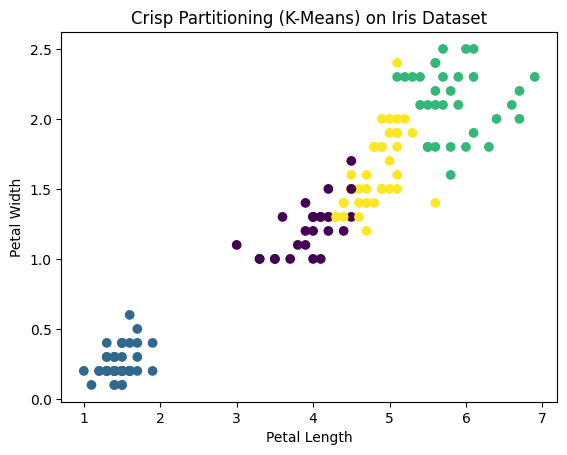

In [1]:
# 8. Crisp partitions
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load real-life Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal/petal length/width)
 # Actual species (not used in clustering)

# Apply Crisp Partitioning using KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X)  # Each point gets a hard cluster label

# Print cluster assignments
print("Cluster labels for each point:", clusters)

# Visualize clusters using two features: petal length and width
plt.scatter(X[:, 2], X[:, 3], c=clusters)
plt.title("Crisp Partitioning (K-Means) on Iris Dataset")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


In [2]:
import numpy as np

# Input and output data (AND gate)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])

# === Hebb's Rule ===
hebb_weights = np.zeros(X.shape[1])
hebb_bias = 0
learning_rate = 0.1
epochs = 5

for epoch in range(epochs):
    for inputs, target in zip(X, y):
        hebb_weights += learning_rate * inputs * target
        hebb_bias += learning_rate * target

print("=== Hebb's Rule ===")
print("Weights:", hebb_weights)
print("Bias:", hebb_bias)

# === Delta Rule (Perceptron Learning) ===
delta_weights = np.zeros(X.shape[1])
delta_bias = 0

for epoch in range(epochs):
    for inputs, target in zip(X, y):
        output = np.dot(inputs, delta_weights) + delta_bias
        prediction = 1 if output >= 0 else 0  # Step function
        error = target - prediction
        delta_weights += learning_rate * error * inputs
        delta_bias += learning_rate * error

print("\n=== Delta Rule ===")
print("Weights:", delta_weights)
print("Bias:", delta_bias)


=== Hebb's Rule ===
Weights: [0.5 0.5]
Bias: 0.5

=== Delta Rule ===
Weights: [0.2 0.1]
Bias: -0.20000000000000004


In [ ]:
#10
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[
    ('lr', clf1), ('nb', clf2), ('dt', clf3)],
    voting='hard')

ensemble.fit(X_train, y_train)
print("Accuracy:", ensemble.score(X_test, y_test))


Accuracy: 0.9555555555555556
